In [ ]:
# Predicting Criminal Justice Involvement in Mental Health Patients (Machine Learning CA2)

In [399]:
## importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [401]:
# DATA LOADING

In [403]:
## importing dataset
ML_CA2_Criminal = pd.read_csv('C:/Users/maxwe/Desktop/MACHINE LEARNING SEP24/CA2/Datasets/Patient_Characteristics_Survey_PCS_2022.csv')

In [404]:
ML_CA2_Criminal.head()

,Survey Year,Program Category,Region Served,Age Group,Sex,Transgender,Sexual Orientation,Hispanic Ethnicity,Race,Living Situation,...,No Insurance,Unknown Insurance Coverage,Medicaid Insurance,Medicaid Managed Insurance,Medicare Insurance,Private Insurance,Child Health Plus Insurance,Other Insurance,Criminal Justice Status,Three Digit Residence Zip Code
0,2022,OUTPATIENT,CENTRAL NY REGION,ADULT,FEMALE,"NO, NOT TRANSGENDER",STRAIGHT OR HETEROSEXUAL,"NO, NOT HISPANIC/LATINO",WHITE ONLY,PRIVATE RESIDENCE,...,NO,NO,YES,YES,NO,NO,NO,NO,NO,130
1,2022,INPATIENT,HUDSON RIVER REGION,ADULT,MALE,"NO, NOT TRANSGENDER",STRAIGHT OR HETEROSEXUAL,"NO, NOT HISPANIC/LATINO",BLACK ONLY,INSTITUTIONAL SETTING,...,NO,NO,UNKNOWN,NOT APPLICABLE,NO,NO,NO,NO,YES,126
2,2022,OUTPATIENT,CENTRAL NY REGION,ADULT,MALE,"NO, NOT TRANSGENDER",STRAIGHT OR HETEROSEXUAL,"NO, NOT HISPANIC/LATINO",WHITE ONLY,PRIVATE RESIDENCE,...,NO,NO,NO,NOT APPLICABLE,YES,NO,NO,YES,NO,139
3,2022,OUTPATIENT,NEW YORK CITY REGION,ADULT,FEMALE,"NO, NOT TRANSGENDER",STRAIGHT OR HETEROSEXUAL,"YES, HISPANIC/LATINO",WHITE ONLY,PRIVATE RESIDENCE,...,NO,NO,YES,YES,NO,NO,NO,NO,NO,104
4,2022,RESIDENTIAL,NEW YORK CITY REGION,ADULT,MALE,"NO, NOT TRANSGENDER",STRAIGHT OR HETEROSEXUAL,"NO, NOT HISPANIC/LATINO",BLACK ONLY,PRIVATE RESIDENCE,...,NO,NO,YES,NO,NO,NO,NO,NO,NO,104


In [407]:
## printing column headers
ML_CA2_Criminal.columns.tolist()

['Survey Year',
 'Program Category',
 'Region Served',
 'Age Group',
 'Sex',
 'Transgender',
 'Sexual Orientation',
 'Hispanic Ethnicity',
 'Race',
 'Living Situation',
 'Household Composition',
 'Preferred Language',
 'Religious Preference',
 'Veteran Status',
 'Employment Status',
 'Number Of Hours Worked Each Week',
 'Education Status',
 'Special Education Services',
 'Mental Illness',
 'Intellectual Disability',
 'Autism Spectrum',
 'Other Developmental Disability',
 'Alcohol Related Disorder',
 'Drug Substance Disorder',
 'Opioid Related Disorder',
 'Mobility Impairment Disorder',
 'Hearing Impairment',
 'Visual Impairment',
 'Speech Impairment',
 'Hyperlipidemia',
 'High Blood Pressure',
 'Diabetes',
 'Obesity',
 'Heart Attack',
 'Stroke',
 'Other Cardiac',
 'Pulmonary Asthma',
 'Alzheimer or Dementia',
 'Kidney Disease',
 'Liver Disease',
 'Endocrine Condition',
 'Neurological Condition',
 'Traumatic Brain Injury',
 'Joint Disease',
 'Cancer',
 'Other Chronic Med Condition',
 'N

In [409]:
# DATA REDUCTION

In [411]:
## filtering and keeping the important columns for our analysis

columns_of_interest = [
    'Age Group',
    'Sex',
    'Race',
    'Education Status',
    'Employment Status',
    'Living Situation',
    'Program Category',
    'Region Served', 
    'Mental Illness',
    'Serious Mental Illness',
    'Cannabis Recreational Use',
    'Drug Substance Disorder',
    'Alcohol Related Disorder',
    'Criminal Justice Status'
]

ML_CA2_Criminal = ML_CA2_Criminal[columns_of_interest]

In [413]:
ML_CA2_Criminal.columns.tolist()

['Age Group',
 'Sex',
 'Race',
 'Education Status',
 'Employment Status',
 'Living Situation',
 'Program Category',
 'Region Served',
 'Mental Illness',
 'Serious Mental Illness',
 'Cannabis Recreational Use',
 'Drug Substance Disorder',
 'Alcohol Related Disorder',
 'Criminal Justice Status']

In [415]:
# DATA CLEANING

In [417]:
## Handling Missing Values

In [421]:
# Count 'UNKNOWN' values for each column
unknown_counts = (ML_CA2_Criminal == 'UNKNOWN').sum()
print(unknown_counts)

Age Group                        0
Sex                           1220
Race                             0
Education Status             27720
Employment Status                0
Living Situation             16531
Program Category                 0
Region Served                    0
Mental Illness                2245
Serious Mental Illness         981
Cannabis Recreational Use    28620
Drug Substance Disorder      12599
Alcohol Related Disorder     12803
Criminal Justice Status      26190
dtype: int64


In [425]:
# printing the percentage of 'UNKNOWN' values for each column
unknown_percentage = (ML_CA2_Criminal == 'UNKNOWN').sum() / len(ML_CA2_Criminal) * 100

for column, percentage in unknown_percentage.items():
   print(f"{column}: {percentage:.2f}%")

Age Group: 0.00%
Sex: 0.59%
Race: 0.00%
Education Status: 13.42%
Employment Status: 0.00%
Living Situation: 8.00%
Program Category: 0.00%
Region Served: 0.00%
Mental Illness: 1.09%
Serious Mental Illness: 0.47%
Cannabis Recreational Use: 13.85%
Drug Substance Disorder: 6.10%
Alcohol Related Disorder: 6.20%
Criminal Justice Status: 12.68%


In [ ]:
## I observe that even though "unknown" values are present in multiple variables, the number of existent data is more than enough for my analysis.
## Therefore, aggressive dropping of "unknown" values is acceptable in this case due to the plethora of data!

In [21]:
## printing the values for all columns to ensure no other forms of NaN values are present
for col in ML_CA2_Criminal.columns:
    print(f"\n{col}:")
    print(ML_CA2_Criminal[col].value_counts())


Age Group:
Age Group
ADULT    163797
CHILD     42815
Name: count, dtype: int64

Sex:
Sex
FEMALE            111578
MALE               93555
UNKNOWN             1220
X (NON-BINARY)       259
Name: count, dtype: int64

Race:
Race
WHITE ONLY      98838
BLACK ONLY      52295
OTHER           38321
UNKNOWN RACE    10559
MULTI-RACIAL     6599
Name: count, dtype: int64

Education Status:
Education Status
MIDDLE SCHOOL TO HIGH SCHOOL    101728
COLLEGE OR GRADUATE DEGREE       30195
UNKNOWN                          27720
SOME COLLEGE                     26124
PRE-K TO FIFTH GRADE             16020
OTHER                             3218
NO FORMAL EDUCATION               1607
Name: count, dtype: int64

Employment Status:
Employment Status
NOT IN LABOR FORCE:UNEMPLOYED AND NOT LOOKING FOR WORK    127643
EMPLOYED                                                   41962
UNEMPLOYED, LOOKING FOR WORK                               21153
UNKNOWN EMPLOYMENT STATUS                                  14759
NON

In [23]:
# Replacing 'UNKNOWN' values with NaN in the entire dataset
ML_CA2_Criminal = ML_CA2_Criminal.replace(['UNKNOWN','UNKNOWN RACE','UNKNOWN EMPLOYMENT STATUS'], np.nan)

# Dropping rows with any NaN values
ML_CA2_Criminal = ML_CA2_Criminal.dropna()

In [25]:
## printing the values for all columns (after NaN drop)
for col in ML_CA2_Criminal.columns:
    print(f"\n{col}:")
    print(ML_CA2_Criminal[col].value_counts())


Age Group:
Age Group
ADULT    113283
CHILD     30641
Name: count, dtype: int64

Sex:
Sex
FEMALE            78098
MALE              65634
X (NON-BINARY)      192
Name: count, dtype: int64

Race:
Race
WHITE ONLY      73308
BLACK ONLY      37939
OTHER           27483
MULTI-RACIAL     5194
Name: count, dtype: int64

Education Status:
Education Status
MIDDLE SCHOOL TO HIGH SCHOOL    81758
COLLEGE OR GRADUATE DEGREE      24792
SOME COLLEGE                    21602
PRE-K TO FIFTH GRADE            12177
OTHER                            2343
NO FORMAL EDUCATION              1252
Name: count, dtype: int64

Employment Status:
Employment Status
NOT IN LABOR FORCE:UNEMPLOYED AND NOT LOOKING FOR WORK    96689
EMPLOYED                                                  31411
UNEMPLOYED, LOOKING FOR WORK                              14912
NON-PAID/VOLUNTEER                                          912
Name: count, dtype: int64

Living Situation:
Living Situation
PRIVATE RESIDENCE         122769
OTHER L

In [ ]:
## DATA GROUPING & STANDARDISATION

In [27]:
# merging MULTI-RACIAL and OTHER into one category "OTHER/MULTI-RACIAL" in Rcae column
ML_CA2_Criminal['Race'] = ML_CA2_Criminal['Race'].replace(['MULTI-RACIAL', 'OTHER'], 'OTHER/MULTI-RACIAL')

In [29]:
# merging NO FORMAL EDUCATION and OTHER into one category "OTHER EDUCATION" in Education Status column
ML_CA2_Criminal['Education Status'] = ML_CA2_Criminal['Education Status'].replace(['NO FORMAL EDUCATION', 'OTHER'], 'OTHER')

In [31]:
# merging 'Program Category' variable, to match the binary categorisation in my other code, based on the intensity of the treatment required
#values NO FORMAL EDUCATION and OTHER into one category "OTHER EDUCATION" in Education Status column
ML_CA2_Criminal['Program Category'] = ML_CA2_Criminal['Program Category'].replace({
    'OUTPATIENT': 'NON-INTENSIVE',
    'SUPPORT': 'NON-INTENSIVE',
    'RESIDENTIAL': 'INTENSIVE', 
    'INPATIENT': 'INTENSIVE',
    'EMERGENCY': 'INTENSIVE'
})

In [33]:
# creating mapping dictionaries for variables with long value names
education_mapping = {
   'MIDDLE SCHOOL TO HIGH SCHOOL': 'HIGH SCHOOL',
   'COLLEGE OR GRADUATE DEGREE': 'COLLEGE+',
   'SOME COLLEGE': 'SOME COLLEGE',
   'PRE-K TO FIFTH GRADE': 'ELEMENTARY',
   'OTHER': 'OTHER',
}

employment_mapping = {
   'NOT IN LABOR FORCE:UNEMPLOYED AND NOT LOOKING FOR WORK': 'NOT IN LABOR FORCE',
   'EMPLOYED': 'EMPLOYED',
   'UNEMPLOYED, LOOKING FOR WORK': 'UNEMPLOYED',
   'NON-PAID/VOLUNTEER': 'VOLUNTEER'
}

living_mapping = {
   'PRIVATE RESIDENCE': 'PRIVATE HOME',
   'OTHER LIVING SITUATION': 'OTHER',
   'INSTITUTIONAL SETTING': 'INSTITUTIONAL'
}

region_mapping = {
    'NEW YORK CITY REGION': 'NY CITY',
    'LONG ISLAND REGION': 'LONG ISLAND',
    'WESTERN REGION': 'WESTERN NY',
    'HUDSON RIVER REGION': 'HUDSON RIVER',
    'CENTRAL NY REGION': 'CENTRAL NY'
}

# Apply mappings to your dataframe
ML_CA2_Criminal['Education Status'] = ML_CA2_Criminal['Education Status'].map(education_mapping)
ML_CA2_Criminal['Employment Status'] = ML_CA2_Criminal['Employment Status'].map(employment_mapping)
ML_CA2_Criminal['Living Situation'] = ML_CA2_Criminal['Living Situation'].map(living_mapping)
ML_CA2_Criminal['Region Served'] = ML_CA2_Criminal['Region Served'].map(region_mapping)

In [ ]:
living_mapping = {
   'PRIVATE RESIDENCE': 'PRIVATE HOME',
   'OTHER LIVING SITUATION': 'OTHER',
   'INSTITUTIONAL SETTING': 'INSTITUTIONAL'
}

In [ ]:
## DATA SAMPLING

In [ ]:
# performing randmom sampling of 12k samples in Criminal Justice Status:NO category 

In [37]:
# importing necessary library
from sklearn.utils import resample

# separating the patients between with Criminal Justice Status = 'YES' and with 'NO'
criminal_record = ML_CA2_Criminal[ML_CA2_Criminal['Criminal Justice Status'] == 'YES']
no_criminal_record = ML_CA2_Criminal[ML_CA2_Criminal['Criminal Justice Status'] == 'NO']

In [39]:
# For NO cases, downsampling randomly from 134,185 to 12,000
no_criminal_sampled = resample(no_criminal_record, replace=False, n_samples=12000, random_state=42)

# For YES cases, downsampling randomly from 9,739 to 8,000
criminal_sampled = resample(criminal_record, replace=False, n_samples=8000, random_state=42)

In [43]:
# Combining sampled datasets
joined_criminal = pd.concat([no_criminal_sampled, criminal_sampled])

# Shuffle the combined dataset
ML_CA2_Criminal = joined_criminal.sample(frac=1, random_state=42).reset_index(drop=True)

In [47]:
### printing Criminal Justice Status distribution
print(ML_CA2_Criminal['Criminal Justice Status'].value_counts())

Criminal Justice Status
NO     12000
YES     8000
Name: count, dtype: int64


In [55]:
# renaming columns for clarity
CA2_criminal_involvement = ML_CA2_Criminal.rename(columns={
    'Age Group': 'age_group',
    'Sex': 'gender',
    'Race': 'race',
    'Education Status': 'education_level',
    'Employment Status': 'employment_status',
    'Living Situation': 'housing_situation',
    'Program Category': 'treatment_intensity',
    'Region Served': 'region',
    'Mental Illness': 'mental_illness',
    'Serious Mental Illness': 'serious_mental_illness',
    'Cannabis Recreational Use': 'cannabis_use',
    'Drug Substance Disorder': 'substance_disorder',
    'Alcohol Related Disorder': 'alcohol_disorder',
    'Criminal Justice Status': 'criminal_involvement'
})

In [161]:
# renaming values in my target variable criminal_involvement
CA2_criminal_involvement['criminal_involvement'] = CA2_criminal_involvement['criminal_involvement'].replace({
    'NO': 'NO RECORD',
    'YES': 'RECORDED'
    })

In [163]:
# exporting the clean categorical dataset to a CSV file
#CA2_criminal_involvement.to_csv('C:/Users/maxwe/Desktop/MACHINE LEARNING SEP24/CA2/Datasets/CA2_criminal_involvement.csv', index=False)

In [ ]:
## EXPLORATORY DATA ANALYSIS (EDA) 

In [ ]:
# Demographic Patterns

In [165]:
# distribution of criminal involvement by age group
print(CA2_criminal_involvement.groupby(['age_group', 'criminal_involvement']).size())
# prevalence of criminal involvement by age group (percentages)
print(pd.crosstab(CA2_criminal_involvement['age_group'], CA2_criminal_involvement['criminal_involvement'], normalize='index') * 100)

age_group  criminal_involvement
ADULT      NO RECORD               9282
           RECORDED                7679
CHILD      NO RECORD               2718
           RECORDED                 321
dtype: int64
criminal_involvement  NO RECORD   RECORDED
age_group                                 
ADULT                 54.725547  45.274453
CHILD                 89.437315  10.562685


(array([0, 1]), [Text(0, 0, 'ADULT'), Text(1, 0, 'CHILD')])

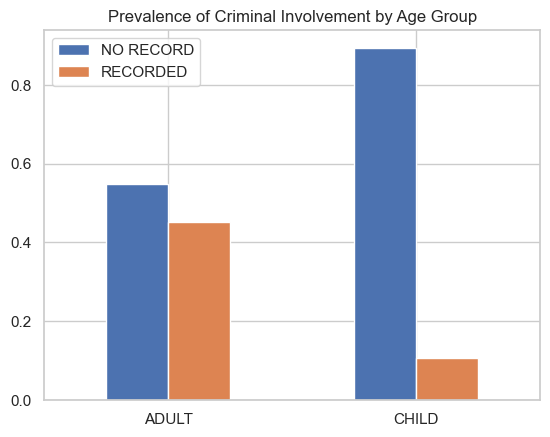

In [167]:
# age group vs criminal involvement
sns.set(style="whitegrid")
pd.crosstab(CA2_criminal_involvement['age_group'], CA2_criminal_involvement['criminal_involvement'], normalize='index').plot(kind='bar')
plt.title('Prevalence of Criminal Involvement by Age Group')
plt.legend(title='')
plt.xlabel('')
plt.xticks(rotation=0)

In [169]:
# distribution of criminal involvement by gender
print(CA2_criminal_involvement.groupby(['gender', 'criminal_involvement']).size())
# prevalence of criminal involvement by gender (percentages)
print(pd.crosstab(CA2_criminal_involvement['gender'], CA2_criminal_involvement['criminal_involvement'], normalize='index') * 100)

gender          criminal_involvement
FEMALE          NO RECORD               6699
                RECORDED                1990
MALE            NO RECORD               5281
                RECORDED                6008
X (NON-BINARY)  NO RECORD                 20
                RECORDED                   2
dtype: int64
criminal_involvement  NO RECORD   RECORDED
gender                                    
FEMALE                77.097480  22.902520
MALE                  46.780051  53.219949
X (NON-BINARY)        90.909091   9.090909


(array([0, 1, 2]),
 [Text(0, 0, 'FEMALE'), Text(1, 0, 'MALE'), Text(2, 0, 'X (NON-BINARY)')])

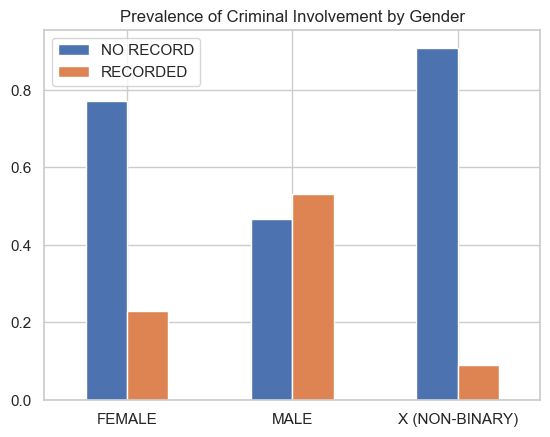

In [171]:
# gender vs criminal involvement
sns.set(style="whitegrid")
pd.crosstab(CA2_criminal_involvement['gender'], CA2_criminal_involvement['criminal_involvement'], normalize='index').plot(kind='bar')
plt.title('Prevalence of Criminal Involvement by Gender')
plt.legend(title='')
plt.xlabel('')
plt.xticks(rotation=0)

In [172]:
# distribution of criminal involvement by race
print(CA2_criminal_involvement.groupby(['race', 'criminal_involvement']).size())
# prevalence of criminal involvement by race (percentages)
print(pd.crosstab(CA2_criminal_involvement['race'], CA2_criminal_involvement['criminal_involvement'], normalize='index') * 100)

race                criminal_involvement
BLACK ONLY          NO RECORD               3142
                    RECORDED                3046
OTHER/MULTI-RACIAL  NO RECORD               2733
                    RECORDED                1303
WHITE ONLY          NO RECORD               6125
                    RECORDED                3651
dtype: int64
criminal_involvement  NO RECORD   RECORDED
race                                      
BLACK ONLY            50.775695  49.224305
OTHER/MULTI-RACIAL    67.715560  32.284440
WHITE ONLY            62.653437  37.346563


(array([0, 1, 2]),
 [Text(0, 0, 'BLACK ONLY'),
  Text(1, 0, 'OTHER/MULTI-RACIAL'),
  Text(2, 0, 'WHITE ONLY')])

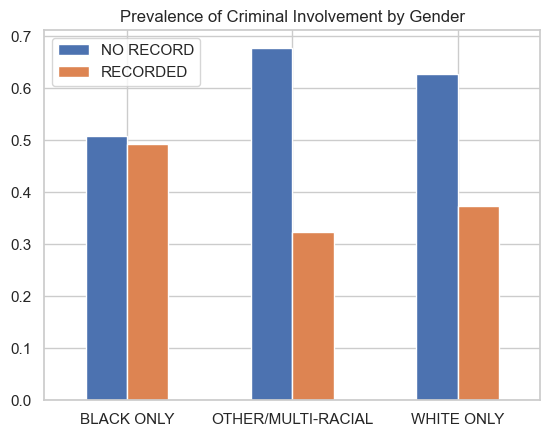

In [175]:
# race vs criminal involvement
sns.set(style="whitegrid")
pd.crosstab(CA2_criminal_involvement['race'], CA2_criminal_involvement['criminal_involvement'], normalize='index').plot(kind='bar')
plt.title('Prevalence of Criminal Involvement by Gender')
plt.legend(title='')
plt.xlabel('')
plt.xticks(rotation=0)

In [177]:
# Socio-economic Patterns

In [179]:
# distribution of criminal involvement by education level
print(CA2_criminal_involvement.groupby(['education_level', 'criminal_involvement']).size())
# prevalence of criminal involvement by education level (percentages)
print(pd.crosstab(CA2_criminal_involvement['education_level'], CA2_criminal_involvement['criminal_involvement'], normalize='index') * 100)

education_level  criminal_involvement
COLLEGE+         NO RECORD               2150
                 RECORDED                 861
ELEMENTARY       NO RECORD               1111
                 RECORDED                  78
HIGH SCHOOL      NO RECORD               6660
                 RECORDED                5749
OTHER            NO RECORD                300
                 RECORDED                 187
SOME COLLEGE     NO RECORD               1779
                 RECORDED                1125
dtype: int64
criminal_involvement  NO RECORD   RECORDED
education_level                           
COLLEGE+              71.404849  28.595151
ELEMENTARY            93.439865   6.560135
HIGH SCHOOL           53.670723  46.329277
OTHER                 61.601643  38.398357
SOME COLLEGE          61.260331  38.739669


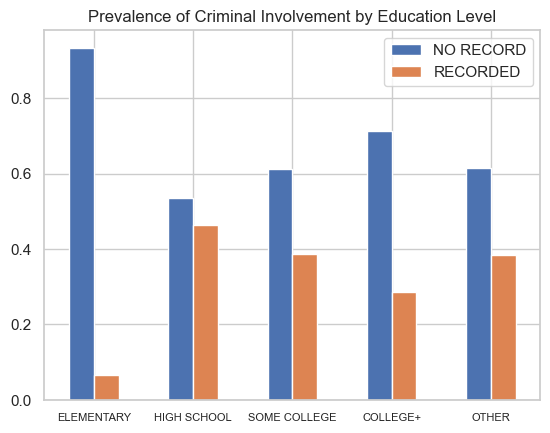

In [181]:
# sorting education level from lowest to highest
education_order = ['ELEMENTARY', 'HIGH SCHOOL', 'SOME COLLEGE', 'COLLEGE+', 'OTHER']

# education level vs criminal involvement
crosstab_data = pd.crosstab(CA2_criminal_involvement['education_level'], CA2_criminal_involvement['criminal_involvement'], normalize='index')
# re-indexing to use the sorted order
crosstab_data = crosstab_data.reindex(education_order)

# plotting with sorted education level
crosstab_data.plot(kind='bar')
plt.title('Prevalence of Criminal Involvement by Education Level')
plt.legend(title='')
plt.xlabel('')
plt.xticks(rotation=0, fontsize=8)
plt.show()

In [183]:
# distribution of criminal involvement by employment level
print(CA2_criminal_involvement.groupby(['employment_status', 'criminal_involvement']).size())
# prevalence of criminal involvement by employment level (percentages)
print(pd.crosstab(CA2_criminal_involvement['employment_status'], CA2_criminal_involvement['criminal_involvement'], normalize='index') * 100)

employment_status   criminal_involvement
EMPLOYED            NO RECORD               2652
                    RECORDED                1473
NOT IN LABOR FORCE  NO RECORD               8093
                    RECORDED                5415
UNEMPLOYED          NO RECORD               1194
                    RECORDED                1064
VOLUNTEER           NO RECORD                 61
                    RECORDED                  48
dtype: int64
criminal_involvement  NO RECORD   RECORDED
employment_status                         
EMPLOYED              64.290909  35.709091
NOT IN LABOR FORCE    59.912644  40.087356
UNEMPLOYED            52.878654  47.121346
VOLUNTEER             55.963303  44.036697


(array([0, 1, 2, 3]),
 [Text(0, 0, 'EMPLOYED'),
  Text(1, 0, 'NOT IN LABOR FORCE'),
  Text(2, 0, 'UNEMPLOYED'),
  Text(3, 0, 'VOLUNTEER')])

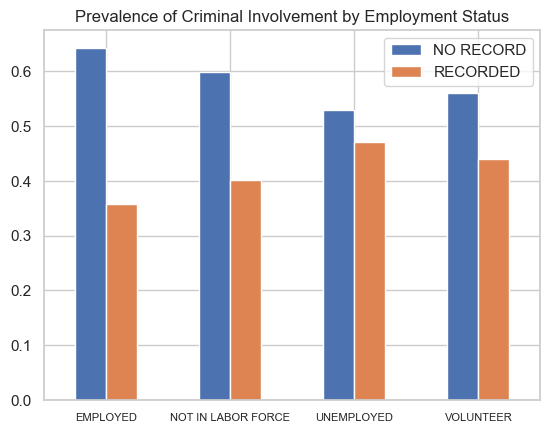

In [185]:
# employment status vs criminal involvement
pd.crosstab(CA2_criminal_involvement['employment_status'], CA2_criminal_involvement['criminal_involvement'], normalize='index').plot(kind='bar')
plt.title('Prevalence of Criminal Involvement by Employment Status')
plt.legend(title='')
plt.xlabel('')
plt.xticks(rotation=0, fontsize=8) 

In [186]:
# distribution of criminal involvement by housing situation
print(CA2_criminal_involvement.groupby(['housing_situation', 'criminal_involvement']).size())
# prevalence of criminal involvement by housing situation (percentages)
print(pd.crosstab(CA2_criminal_involvement['housing_situation'], CA2_criminal_involvement['criminal_involvement'], normalize='index') * 100)

housing_situation  criminal_involvement
INSTITUTIONAL      NO RECORD                  43
                   RECORDED                  343
OTHER              NO RECORD                1472
                   RECORDED                 3302
PRIVATE HOME       NO RECORD               10485
                   RECORDED                 4355
dtype: int64
criminal_involvement  NO RECORD   RECORDED
housing_situation                         
INSTITUTIONAL         11.139896  88.860104
OTHER                 30.833682  69.166318
PRIVATE HOME          70.653639  29.346361


(array([0, 1, 2]),
 [Text(0, 0, 'INSTITUTIONAL'),
  Text(1, 0, 'OTHER'),
  Text(2, 0, 'PRIVATE HOME')])

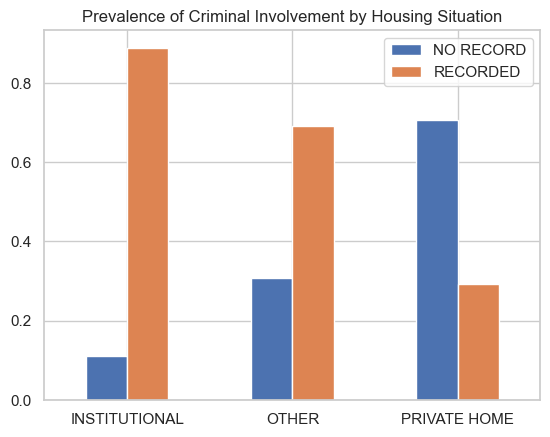

In [189]:
# housing situation vs criminal involvement
pd.crosstab(CA2_criminal_involvement['housing_situation'], CA2_criminal_involvement['criminal_involvement'], normalize='index').plot(kind='bar')
plt.title('Prevalence of Criminal Involvement by Housing Situation')
plt.legend(title='')
plt.xlabel('')
plt.xticks(rotation=0)

In [191]:
# distribution of criminal involvement by region
print(CA2_criminal_involvement.groupby(['region', 'criminal_involvement']).size())
# prevalence of criminal involvement by region (percentages)
print(pd.crosstab(CA2_criminal_involvement['region'], CA2_criminal_involvement['criminal_involvement'], normalize='index') * 100)

region        criminal_involvement
CENTRAL NY    NO RECORD               1414
              RECORDED                1260
HUDSON RIVER  NO RECORD               1678
              RECORDED                1571
LONG ISLAND   NO RECORD               1023
              RECORDED                 496
NY CITY       NO RECORD               6135
              RECORDED                2620
WESTERN NY    NO RECORD               1750
              RECORDED                2053
dtype: int64
criminal_involvement  NO RECORD   RECORDED
region                                    
CENTRAL NY            52.879581  47.120419
HUDSON RIVER          51.646661  48.353339
LONG ISLAND           67.346939  32.653061
NY CITY               70.074243  29.925757
WESTERN NY            46.016303  53.983697


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'CENTRAL NY'),
  Text(1, 0, 'HUDSON RIVER'),
  Text(2, 0, 'LONG ISLAND'),
  Text(3, 0, 'NY CITY'),
  Text(4, 0, 'WESTERN NY')])

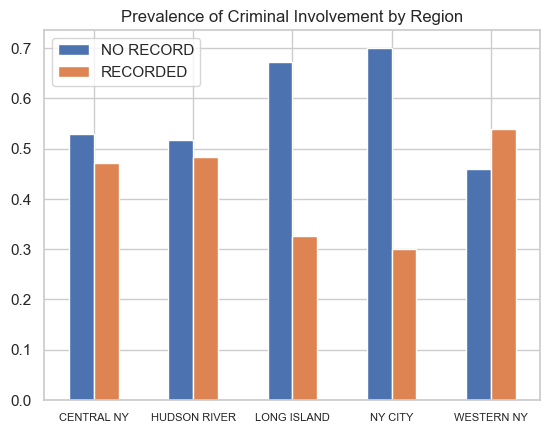

In [193]:
# region vs criminal involvement
pd.crosstab(CA2_criminal_involvement['region'], CA2_criminal_involvement['criminal_involvement'], normalize='index').plot(kind='bar')
plt.title('Prevalence of Criminal Involvement by Region')
plt.legend(title='')
plt.xlabel('')
plt.xticks(rotation=0, fontsize=8) 

In [194]:
# Clinical diagnoses & disorders

In [197]:
clinical_cols = ['mental_illness', 'serious_mental_illness', 'cannabis_use', 'substance_disorder', 'alcohol_disorder']
for col in clinical_cols:
    print(f"\n{col}:")
    print(pd.crosstab(CA2_criminal_involvement[col], CA2_criminal_involvement['criminal_involvement']))

for col in clinical_cols:
    print(f"\n{col}:")
    print(pd.crosstab(CA2_criminal_involvement[col], CA2_criminal_involvement['criminal_involvement'], normalize='index'))


mental_illness:
criminal_involvement  NO RECORD  RECORDED
mental_illness                           
NO                          332       223
YES                       11668      7777

serious_mental_illness:
criminal_involvement    NO RECORD  RECORDED
serious_mental_illness                     
NO                            774       845
YES                         11226      7155

cannabis_use:
criminal_involvement  NO RECORD  RECORDED
cannabis_use                             
NO                         9805      5603
YES                        2195      2397

substance_disorder:
criminal_involvement  NO RECORD  RECORDED
substance_disorder                       
NO                        10511      4996
YES                        1489      3004

alcohol_disorder:
criminal_involvement  NO RECORD  RECORDED
alcohol_disorder                         
NO                        10971      6023
YES                        1029      1977

mental_illness:
criminal_involvement  NO RECORD  RECOR

(array([0, 1]), [Text(0, 0, 'NO'), Text(1, 0, 'YES')])

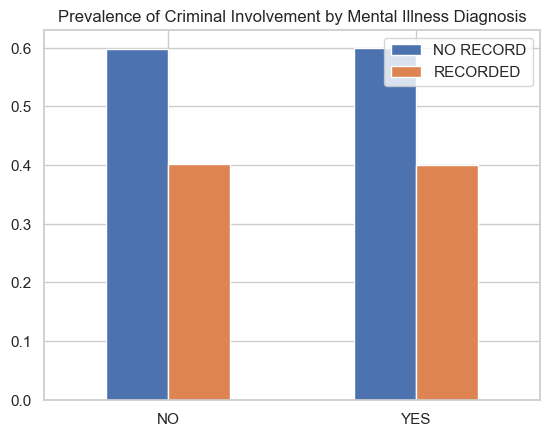

In [199]:
# mental illness diagnosis vs criminal involvement
pd.crosstab(CA2_criminal_involvement['mental_illness'], CA2_criminal_involvement['criminal_involvement'], normalize='index').plot(kind='bar')
plt.title('Prevalence of Criminal Involvement by Mental Illness Diagnosis')
plt.legend(title='')
plt.xlabel('')
plt.xticks(rotation=0) 

(array([0, 1]), [Text(0, 0, 'NO'), Text(1, 0, 'YES')])

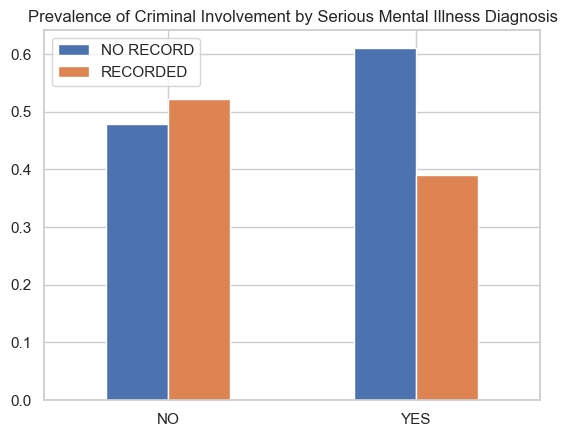

In [201]:
# mental illness diagnosis vs criminal involvement
pd.crosstab(CA2_criminal_involvement['serious_mental_illness'], CA2_criminal_involvement['criminal_involvement'], normalize='index').plot(kind='bar')
plt.title('Prevalence of Criminal Involvement by Serious Mental Illness Diagnosis')
plt.legend(title='')
plt.xlabel('')
plt.xticks(rotation=0) 

(array([0, 1]), [Text(0, 0, 'NO'), Text(1, 0, 'YES')])

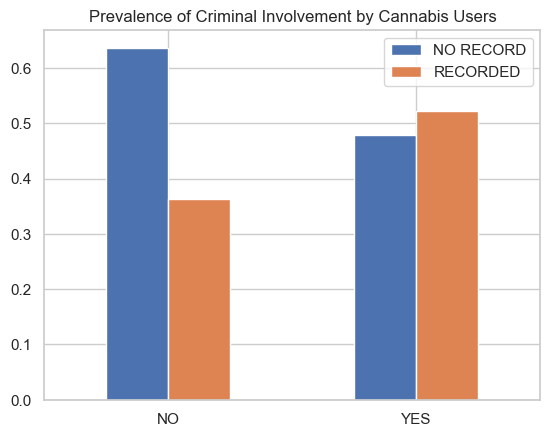

In [203]:
# Cannabis Recreational Use vs criminal involvement
pd.crosstab(CA2_criminal_involvement['cannabis_use'], CA2_criminal_involvement['criminal_involvement'], normalize='index').plot(kind='bar')
plt.title('Prevalence of Criminal Involvement by Cannabis Users')
plt.legend(title='')
plt.xlabel('')
plt.xticks(rotation=0) 

(array([0, 1]), [Text(0, 0, 'NO'), Text(1, 0, 'YES')])

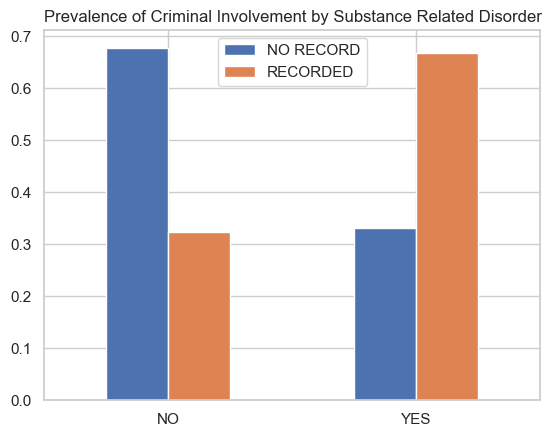

In [205]:
# drug substance disorder vs criminal_involvement
pd.crosstab(CA2_criminal_involvement['substance_disorder'], CA2_criminal_involvement['criminal_involvement'], normalize='index').plot(kind='bar')
plt.title('Prevalence of Criminal Involvement by Substance Related Disorder')
plt.legend(title='')
plt.xlabel('')
plt.xticks(rotation=0)

(array([0, 1]), [Text(0, 0, 'NO'), Text(1, 0, 'YES')])

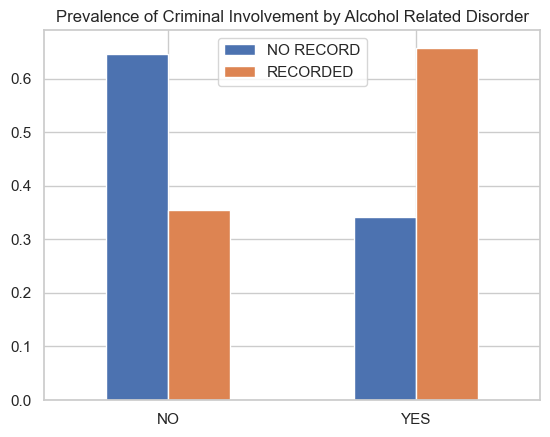

In [247]:
# alcohol disorder vs criminal_involvement
pd.crosstab(CA2_criminal_involvement['alcohol_disorder'], CA2_criminal_involvement['criminal_involvement'], normalize='index').plot(kind='bar')
plt.title('Prevalence of Criminal Involvement by Alcohol Related Disorder')
plt.legend(title='')
plt.xlabel('')
plt.xticks(rotation=0)

In [ ]:
# DATA TRANSFORMATION

In [ ]:
# Encoding values from Categorical to Numerical

In [209]:
# printing the values for all columns
for col in CA2_criminal_involvement.columns:
    print(f"\n{col}:")
    print(CA2_criminal_involvement[col].value_counts())


age_group:
age_group
ADULT    16961
CHILD     3039
Name: count, dtype: int64

gender:
gender
MALE              11289
FEMALE             8689
X (NON-BINARY)       22
Name: count, dtype: int64

race:
race
WHITE ONLY            9776
BLACK ONLY            6188
OTHER/MULTI-RACIAL    4036
Name: count, dtype: int64

education_level:
education_level
HIGH SCHOOL     12409
COLLEGE+         3011
SOME COLLEGE     2904
ELEMENTARY       1189
OTHER             487
Name: count, dtype: int64

employment_status:
employment_status
NOT IN LABOR FORCE    13508
EMPLOYED               4125
UNEMPLOYED             2258
VOLUNTEER               109
Name: count, dtype: int64

housing_situation:
housing_situation
PRIVATE HOME     14840
OTHER             4774
INSTITUTIONAL      386
Name: count, dtype: int64

treatment_intensity:
treatment_intensity
NON-INTENSIVE    15347
INTENSIVE         4653
Name: count, dtype: int64

region:
region
NY CITY         8755
WESTERN NY      3803
HUDSON RIVER    3249
CENTRAL NY      2

In [249]:
# Mapping Binary Columns: YES/NO to 1/0
map_bin_cols = [
    'mental_illness', 'serious_mental_illness',
    'cannabis_use', 'substance_disorder', 'alcohol_disorder'
]

for col in map_bin_cols:
    CA2_criminal_involvement[col] = CA2_criminal_involvement[col].map({'YES': 1, 'NO': 0})

In [251]:
# Mapping Categorical Columns

In [253]:
# Age Group
map_age = {
    'ADULT': 1,
    'CHILD': 0
}

CA2_criminal_involvement['age_group'] = CA2_criminal_involvement['age_group'].map(map_age)

In [255]:
# Gender
map_gender = {
    'MALE': 1,
    'FEMALE': 0,
    'X (NON-BINARY)':1
}

CA2_criminal_involvement['gender'] = CA2_criminal_involvement['gender'].map(map_gender)

In [257]:
# Race
map_race = {
    'WHITE ONLY': 1,
    'BLACK ONLY': 2,
    'OTHER/MULTI-RACIAL': 0
}

CA2_criminal_involvement['race'] = CA2_criminal_involvement['race'].map(map_race)

In [259]:
# Education
map_education = {
    'ELEMENTARY': 0,
    'HIGH SCHOOL': 1,
    'SOME COLLEGE': 2,  
    'COLLEGE+': 3,
    'OTHER': 4,
}

CA2_criminal_involvement['education_level'] = CA2_criminal_involvement['education_level'].map(map_education)

In [261]:
# Employment
map_employment = {
    'NOT IN LABOR FORCE': 0,
    'EMPLOYED': 1,
    'UNEMPLOYED': 2,
    'VOLUNTEER': 3,
}

CA2_criminal_involvement['employment_status'] = CA2_criminal_involvement['employment_status'].map(map_employment)

In [263]:
# Housing
map_housing = {
    'OTHER': 0,
    'PRIVATE HOME': 1,
    'INSTITUTIONAL': 2
}

CA2_criminal_involvement['housing_situation'] = CA2_criminal_involvement['housing_situation'].map(map_housing)

In [265]:
# Treatment Intensity Level
map_treatment = {
    'INTENSIVE': 1,
    'NON-INTENSIVE': 0
}

CA2_criminal_involvement['treatment_intensity'] = CA2_criminal_involvement['treatment_intensity'].map(map_treatment)

In [267]:
# Region
map_region = {
    'NY CITY': 0,
    'WESTERN NY': 1,
    'HUDSON RIVER': 2,
    'CENTRAL NY': 3,
    'LONG ISLAND': 4,
}

CA2_criminal_involvement['region'] = CA2_criminal_involvement['region'].map(map_region)

In [269]:
# Criminal involvement
map_criminal = {
    'RECORDED': 1,
    'NO RECORD': 0
}

CA2_criminal_involvement['criminal_involvement'] = CA2_criminal_involvement['criminal_involvement'].map(map_criminal)

In [271]:
# printing the values for all columns after encoding
for col in CA2_criminal_involvement.columns:
    print(f"\n{col}:")
    print(CA2_criminal_involvement[col].value_counts())


age_group:
age_group
1    16961
0     3039
Name: count, dtype: int64

gender:
gender
1    11311
0     8689
Name: count, dtype: int64

race:
race
1    9776
2    6188
0    4036
Name: count, dtype: int64

education_level:
education_level
1    12409
3     3011
2     2904
0     1189
4      487
Name: count, dtype: int64

employment_status:
employment_status
0    13508
1     4125
2     2258
3      109
Name: count, dtype: int64

housing_situation:
housing_situation
1    14840
0     4774
2      386
Name: count, dtype: int64

treatment_intensity:
treatment_intensity
0    15347
1     4653
Name: count, dtype: int64

region:
region
0    8755
1    3803
2    3249
3    2674
4    1519
Name: count, dtype: int64

mental_illness:
mental_illness
1    19445
0      555
Name: count, dtype: int64

serious_mental_illness:
serious_mental_illness
1    18381
0     1619
Name: count, dtype: int64

cannabis_use:
cannabis_use
0    15408
1     4592
Name: count, dtype: int64

substance_disorder:
substance_disorder
0   

In [273]:
# exporting the clean categorical dataset to a CSV file
#CA2_criminal_involvement.to_csv('C:/Users/maxwe/Desktop/MACHINE LEARNING SEP24/CA2/Datasets/CA2_criminal_involvement_encoded.csv', index=False)

In [ ]:
# Visualisations: Features correlation

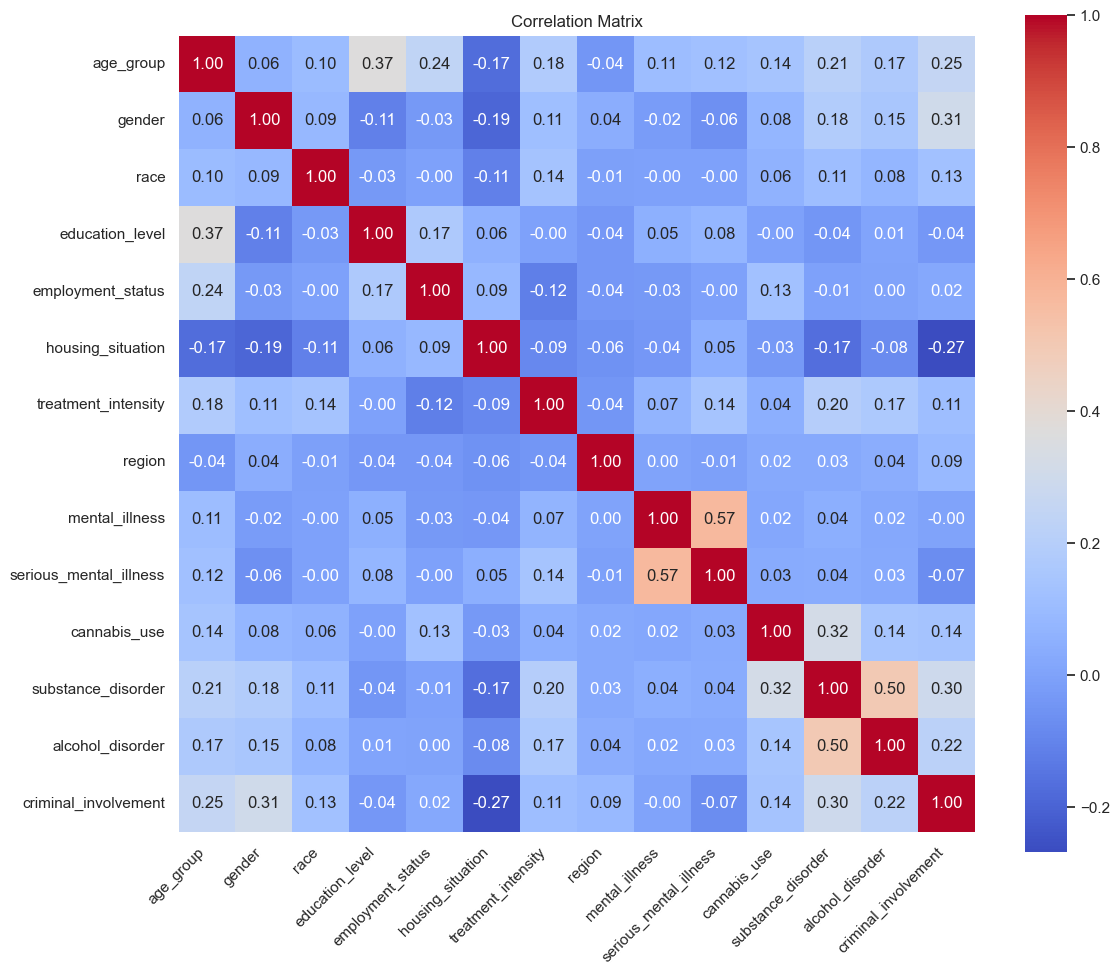

In [275]:
## running the Pearson correlation coefficient to plot correlation matrix
correlation_matrix = CA2_criminal_involvement.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)

plt.title('Correlation Matrix')
plt.xticks(rotation=45,ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
# based on the correlation matrix I will use the folloing 7 features:
# gender (0.31), substance_disorder (0.30), housing_situation (-0.27), age_group (0.25), 
# alcohol_disorder (0.22), treatment_intensity (0.18) , education_level (-0.11 to 0.37 with other features)

In [ ]:
## MODELING

In [277]:
# creating features dataframe (7 features)
features = [ 'gender', 'substance_disorder', 'housing_situation',  'age_group', 'alcohol_disorder','treatment_intensity', 'education_level']
# features 
X = CA2_criminal_involvement[features]
y = CA2_criminal_involvement['criminal_involvement']  

from sklearn.model_selection import train_test_split

# splitting Train/Test variables with stratification=yes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
## LOGISTIC REGRESSION ##

In [279]:
# Importing model
from sklearn.linear_model import LogisticRegression

# Initializing the model
logreg = LogisticRegression(max_iter=1000, random_state=42)

# Training the model
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [281]:
# Making predictions
# Predicting class labels & predicting probabilities for the positive class: criminal_involvement = 1 (RECORDED)
y_pred = logreg.predict(X_test)
y_proba = logreg.predict_proba(X_test)[:, 1]  # For ROC-AUC

In [ ]:
## LOGISTIC REGRESSION - Evaluation Performance 

In [283]:
# Importing performance metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_auc_score, roc_curve

# Performance Metrics
print("Logistic Regression Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(f"Precision: {precision_score(y_test, y_pred):.2f}")
print(f"Recall: {recall_score(y_test, y_pred):.2f}")
print(f"F1-Score: {f1_score(y_test, y_pred):.2f}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_proba):.2f}")

# Saving performance metrics
lr_accuracy = accuracy_score(y_test, y_pred)
lr_precision = precision_score(y_test, y_pred)
lr_recall = recall_score(y_test, y_pred)
lr_f1score = f1_score(y_test, y_pred)
lr_rocauc = roc_auc_score(y_test, y_proba)

Logistic Regression Results:
Accuracy: 0.72
Precision: 0.70
Recall: 0.55
F1-Score: 0.61
ROC-AUC: 0.77


In [285]:
# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.84      0.79      2400
           1       0.70      0.55      0.61      1600

    accuracy                           0.72      4000
   macro avg       0.72      0.69      0.70      4000
weighted avg       0.72      0.72      0.72      4000



In [287]:
# Confusion Matrix: Actual vs Predicted
crosstab_logreg = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted']) 
print("Crosstab (Confusion Matrix):\n")
print(crosstab_logreg)

Crosstab (Confusion Matrix):

Predicted     0    1
Actual              
0          2020  380
1           726  874


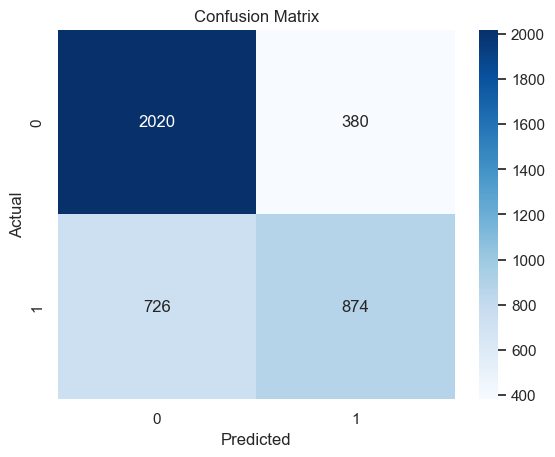

In [289]:
# Confusion Matrix: Actual vs Predicted
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

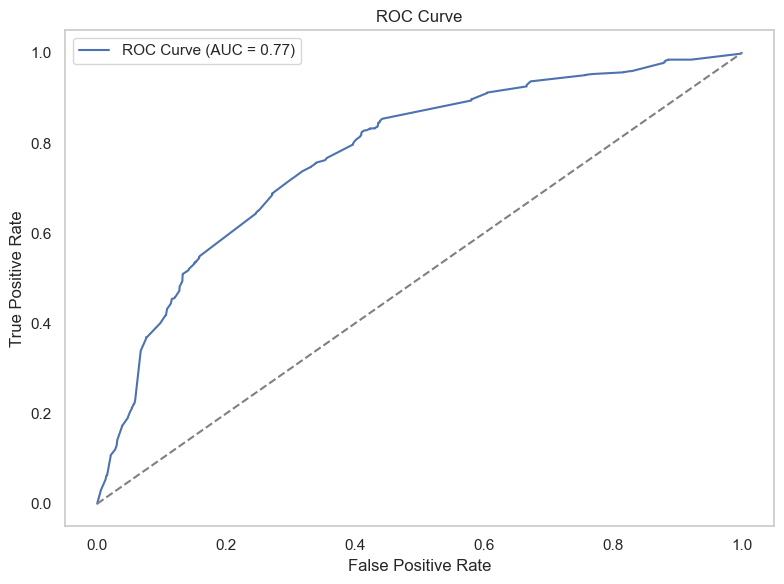

In [293]:
# Ploting ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {lr_rocauc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

In [ ]:
## NAIVE BAYES ##

In [295]:
# Importing model
from sklearn.naive_bayes import GaussianNB

# Initializing the model
nb = GaussianNB()

# Training the model
nb.fit(X_train, y_train)

GaussianNB()

In [299]:
# Making predictions
y_pred_nb = nb.predict(X_test)
y_proba_nb = nb.predict_proba(X_test)[:, 1]  # For ROC-AUC

In [ ]:
## NAIVE BAYES - Evaluation Performance

In [301]:
# Performance Metrics
print("Naive Bayes Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_nb):.2f}")
print(f"Precision: {precision_score(y_test, y_pred_nb):.2f}")
print(f"Recall: {recall_score(y_test, y_pred_nb):.2f}")
print(f"F1-Score: {f1_score(y_test, y_pred_nb):.2f}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_proba_nb):.2f}")

# Saving performance metrics
nb_accuracy = accuracy_score(y_test, y_pred_nb)
nb_precision = precision_score(y_test, y_pred_nb)
nb_recall = recall_score(y_test, y_pred_nb)
nb_f1score = f1_score(y_test, y_pred_nb)
nb_rocauc = roc_auc_score(y_test, y_proba_nb)

Naive Bayes Results:
Accuracy: 0.72
Precision: 0.64
Recall: 0.69
F1-Score: 0.66
ROC-AUC: 0.77


In [303]:
# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred_nb))

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.74      0.76      2400
           1       0.64      0.69      0.66      1600

    accuracy                           0.72      4000
   macro avg       0.71      0.71      0.71      4000
weighted avg       0.72      0.72      0.72      4000



In [305]:
# Confusion Matrix (Crosstab)
crosstab_nb = pd.crosstab(y_test, y_pred_nb, rownames=['Actual'], colnames=['Predicted'])
print("Crosstab (Confusion Matrix):\n")
print(crosstab_nb)

Crosstab (Confusion Matrix):

Predicted     0     1
Actual               
0          1772   628
1           497  1103


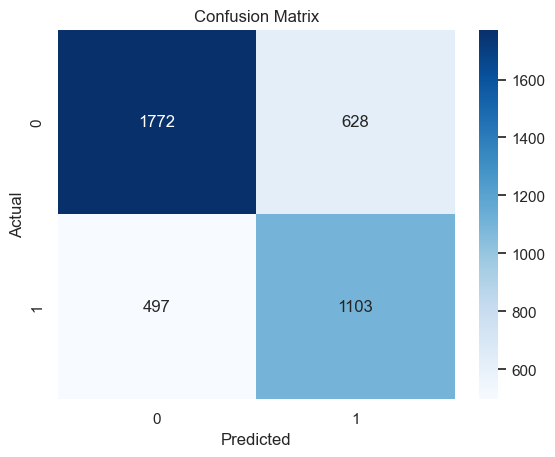

In [307]:
# Confusion Matrix Heatmap
cm_nb = confusion_matrix(y_test, y_pred_nb)
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

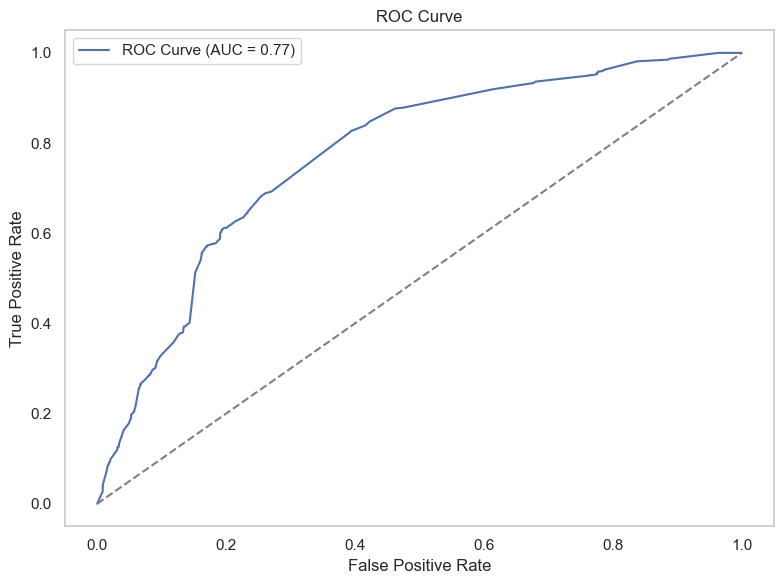

In [309]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba_nb)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {nb_rocauc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

In [ ]:
## DECISION TREE ##

In [311]:
# Importing model
from sklearn.tree import DecisionTreeClassifier

# Initializing the model
dtree = DecisionTreeClassifier(random_state=42)

# Training the model
dtree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [313]:
# Making predictions
y_pred_dt = dtree.predict(X_test)
y_proba_dt = dtree.predict_proba(X_test)[:, 1]  # For ROC-AUC

In [ ]:
## DECISION TREE - Evaluation Performance 

In [315]:
# Performance Metrics
print("Decision Tree Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_dt):.2f}")
print(f"Precision: {precision_score(y_test, y_pred_dt):.2f}")
print(f"Recall: {recall_score(y_test, y_pred_dt):.2f}")
print(f"F1-Score: {f1_score(y_test, y_pred_dt):.2f}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_proba_dt):.2f}")

# Saving performance metrics
dt_accuracy = accuracy_score(y_test, y_pred_dt)
dt_precision = precision_score(y_test, y_pred_dt)
dt_recall = recall_score(y_test, y_pred_dt)
dt_f1score = f1_score(y_test, y_pred_dt)
dt_rocauc = roc_auc_score(y_test, y_proba_dt)

Decision Tree Results:
Accuracy: 0.73
Precision: 0.72
Recall: 0.54
F1-Score: 0.61
ROC-AUC: 0.80


In [317]:
# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred_dt))

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.86      0.79      2400
           1       0.72      0.54      0.61      1600

    accuracy                           0.73      4000
   macro avg       0.73      0.70      0.70      4000
weighted avg       0.73      0.73      0.72      4000



In [319]:
# Confusion Matrix: Actual vs Predicted
crosstab_dtree = pd.crosstab(y_test, y_pred_dt, rownames=['Actual'], colnames=['Predicted'])
print("Crosstab (Confusion Matrix):\n")
print(crosstab_dtree)

Crosstab (Confusion Matrix):

Predicted     0    1
Actual              
0          2064  336
1           741  859


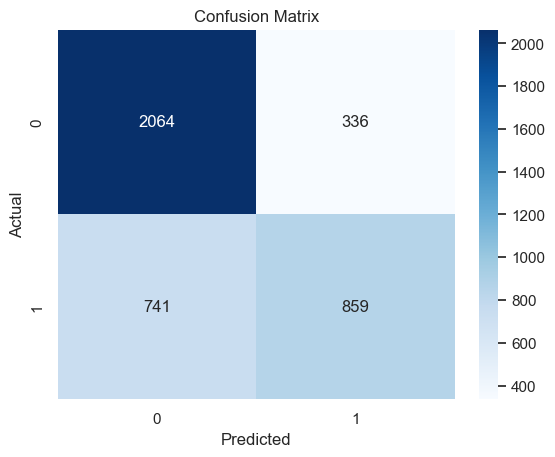

In [321]:
# Confusion Matrix: Actual vs Predicted
cm_dt = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

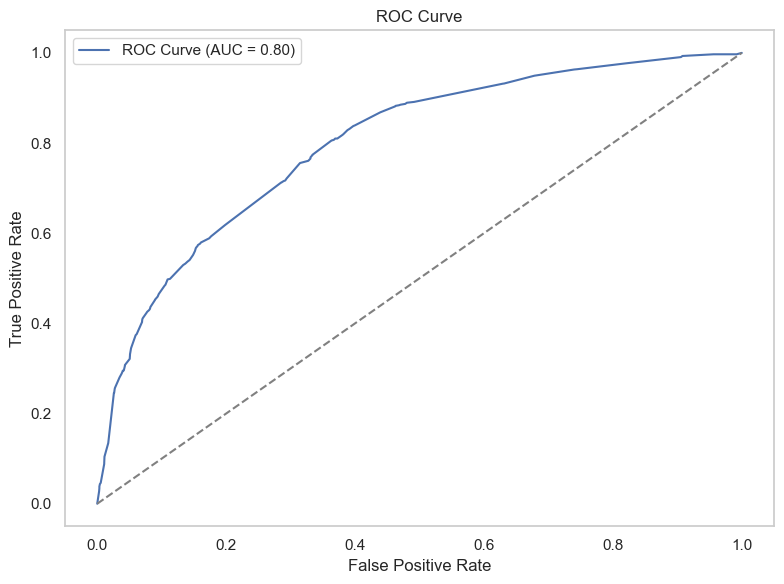

In [323]:
# Ploting ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba_dt)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {dt_rocauc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

In [ ]:
# Feature Importance

In [325]:
# Getting feature importances from Decision Tree model
dt_feature_importances = dtree.feature_importances_

# Creating a dataFrame of important features
dt_feature_importance_df = pd.DataFrame({'Feature': X_train.columns,'Importance': dt_feature_importances}).sort_values(by='Importance', ascending=False)

print(dt_feature_importance_df)

               Feature  Importance
2    housing_situation    0.444687
1   substance_disorder    0.192735
0               gender    0.137569
3            age_group    0.107400
6      education_level    0.049939
5  treatment_intensity    0.041797
4     alcohol_disorder    0.025873


C:\Users\maxwe\AppData\Local\Temp\ipykernel_24852\2903227114.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=dt_feature_importance_df.head(7), palette='cividis')


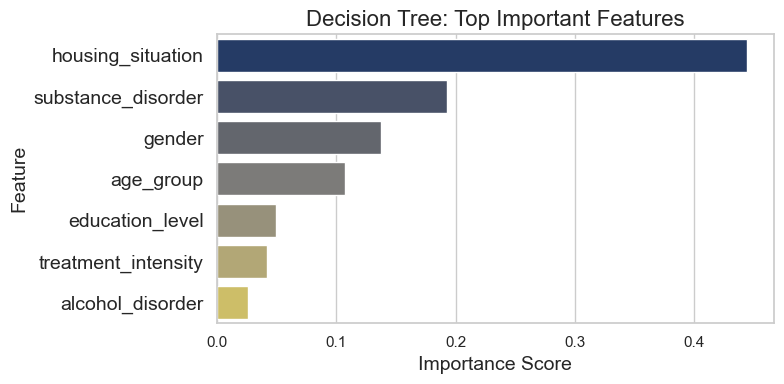

In [327]:
# Plotting 
plt.figure(figsize=(8, 4))

sns.barplot(x='Importance', y='Feature', data=dt_feature_importance_df.head(7), palette='cividis')
plt.title('Decision Tree: Top Important Features', fontsize=16)
plt.xlabel('Importance Score', fontsize=14)
plt.ylabel('Feature', fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()
plt.show()

In [ ]:
## K-Nearest Neighbors ##

In [329]:
# Importing model
from sklearn.neighbors import KNeighborsClassifier

# Initializing the model
knn = KNeighborsClassifier(n_neighbors=10)

# Training the model
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [331]:
# Making predictions
y_pred_knn = knn.predict(X_test)
y_proba_knn = knn.predict_proba(X_test)[:, 1]  # For ROC-AUC

In [ ]:
## KNN - Evaluation Performance

In [333]:
print("KNN Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn):.2f}")
print(f"Precision: {precision_score(y_test, y_pred_knn):.2f}")
print(f"Recall: {recall_score(y_test, y_pred_knn):.2f}")
print(f"F1-Score: {f1_score(y_test, y_pred_knn):.2f}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_proba_knn):.2f}")

# Saving performance metrics
knn_accuracy = accuracy_score(y_test, y_pred_knn)
knn_precision = precision_score(y_test, y_pred_knn)
knn_recall = recall_score(y_test, y_pred_knn)
knn_f1score = f1_score(y_test, y_pred_knn)
knn_rocauc = roc_auc_score(y_test, y_proba_knn)

KNN Results:
Accuracy: 0.71
Precision: 0.63
Recall: 0.66
F1-Score: 0.65
ROC-AUC: 0.78


In [335]:
# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred_knn))

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.74      0.76      2400
           1       0.63      0.66      0.65      1600

    accuracy                           0.71      4000
   macro avg       0.70      0.70      0.70      4000
weighted avg       0.71      0.71      0.71      4000



In [337]:
# Confusion Matrix (Crosstab)
crosstab_knn = pd.crosstab(y_test, y_pred_knn, rownames=['Actual'], colnames=['Predicted'])
print("Crosstab (Confusion Matrix):\n")
print(crosstab_knn)

Crosstab (Confusion Matrix):

Predicted     0     1
Actual               
0          1788   612
1           539  1061


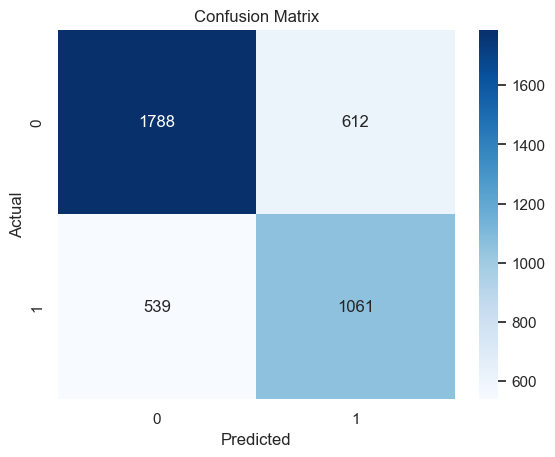

In [339]:
# Confusion Matrix Heatmap
cm_knn = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

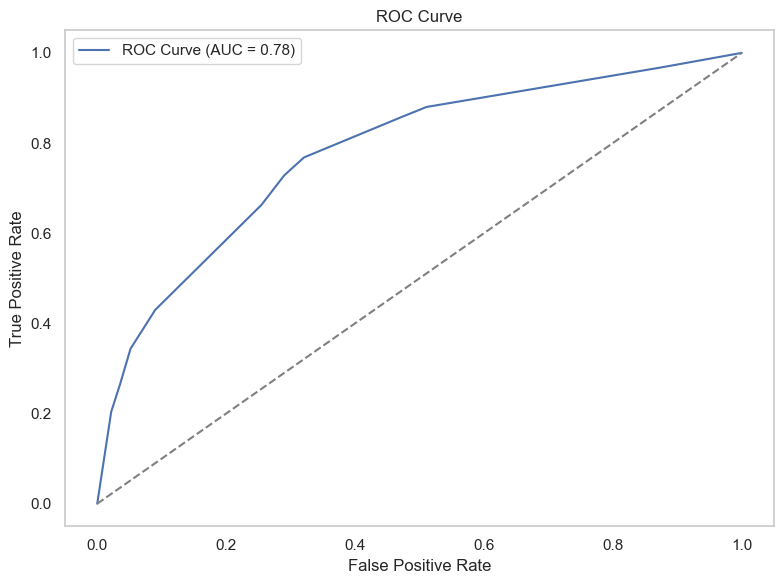

In [341]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba_knn)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {knn_rocauc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

In [ ]:
## RANDOM FOREST ##

In [343]:
# importing model
from sklearn.ensemble import RandomForestClassifier

# Initializing the model
rf_model = RandomForestClassifier(n_estimators=100, max_depth=None, max_features='sqrt', random_state=42)

# Training the model
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [345]:
# Making predictions
# Predicting class labels & predicting probabilities for the positive class: treatment_intensity = 1 (INTENSIVE)
y_pred_rf = rf_model.predict(X_test)
y_proba_rf = rf_model.predict_proba(X_test)[:, 1]

In [ ]:
## RANDOM FOREST - Evaluation Performance 

In [347]:
# Performance Metrics
print("Random Forest Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.2f}")
print(f"Precision: {precision_score(y_test, y_pred_rf):.2f}")
print(f"Recall: {recall_score(y_test, y_pred_rf):.2f}")
print(f"F1-Score: {f1_score(y_test, y_pred_rf):.2f}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_proba_rf):.2f}")

# Saving performance metrics
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_precision = precision_score(y_test, y_pred_rf)
rf_recall = recall_score(y_test, y_pred_rf)
rf_f1score = f1_score(y_test, y_pred_rf)
rf_rocauc = roc_auc_score(y_test, y_proba_rf)

Random Forest Results:
Accuracy: 0.73
Precision: 0.72
Recall: 0.54
F1-Score: 0.62
ROC-AUC: 0.80


In [349]:
# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.86      0.79      2400
           1       0.72      0.54      0.62      1600

    accuracy                           0.73      4000
   macro avg       0.73      0.70      0.70      4000
weighted avg       0.73      0.73      0.72      4000



In [351]:
# Confusion Matrix: Actual vs Predicted
crosstab_rf = pd.crosstab(y_test, y_pred_rf, rownames=['Actual'], colnames=['Predicted'])
print("Crosstab (Confusion Matrix):\n")
print(crosstab_rf)

Crosstab (Confusion Matrix):

Predicted     0    1
Actual              
0          2060  340
1           738  862


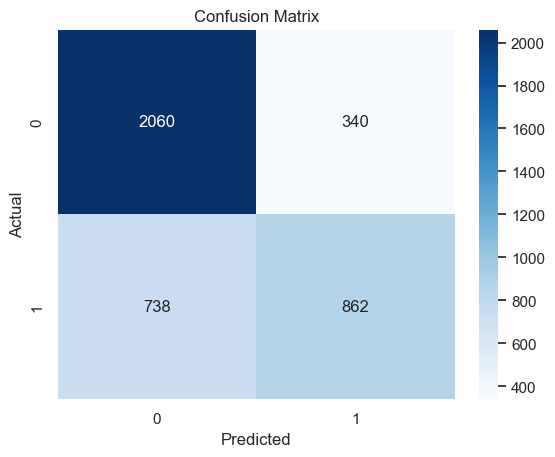

In [353]:
# Confusion Matrix: Actual vs Predicted
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

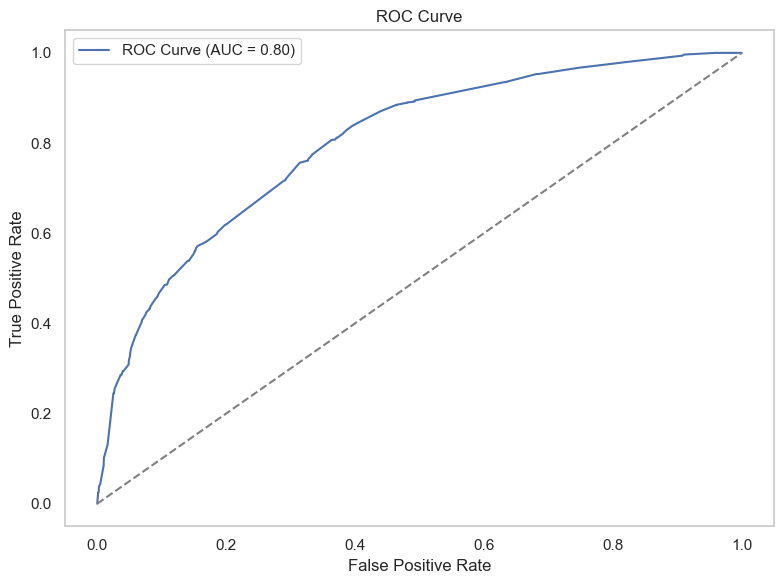

In [355]:
# Ploting ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba_rf)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {rf_rocauc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

In [357]:
# Getting feature importances from Decision Tree model
rf_feature_importances = rf_model.feature_importances_

# Creating a dataFrame of important features
rf_feature_importance_df = pd.DataFrame({'Feature': X_train.columns,'Importance': rf_feature_importances}).sort_values(by='Importance', ascending=False)

print(rf_feature_importance_df)

               Feature  Importance
2    housing_situation    0.318949
0               gender    0.211911
1   substance_disorder    0.159519
3            age_group    0.116085
6      education_level    0.092307
4     alcohol_disorder    0.057231
5  treatment_intensity    0.043998


C:\Users\maxwe\AppData\Local\Temp\ipykernel_24852\3690426046.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=rf_feature_importance_df.head(7), palette='viridis')


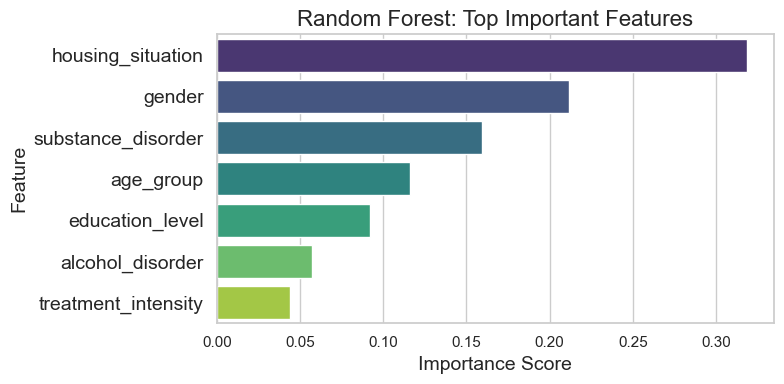

In [359]:
# Plotting 
plt.figure(figsize=(8, 4))

sns.barplot(x='Importance', y='Feature', data=rf_feature_importance_df.head(7), palette='viridis')
plt.title('Random Forest: Top Important Features', fontsize=16)
plt.xlabel('Importance Score', fontsize=14)
plt.ylabel('Feature', fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()
plt.show()

In [ ]:
## MODEL COMPARISON ##

In [361]:
# Collecting all metrics in a list of dictionaries
all_model_metrics = [
    {'Model': 'Logistic Regression', 'Accuracy': lr_accuracy, 'Precision': lr_precision, 'Recall': lr_recall, 'F1-Score': lr_f1score, 'ROC-AUC': lr_rocauc},
    {'Model': 'Naive Bayes', 'Accuracy': nb_accuracy, 'Precision': nb_precision, 'Recall': nb_recall, 'F1-Score': nb_f1score, 'ROC-AUC': nb_rocauc},
    {'Model': 'Decision Tree', 'Accuracy': dt_accuracy, 'Precision': dt_precision, 'Recall': dt_recall, 'F1-Score': dt_f1score, 'ROC-AUC': dt_rocauc},
    {'Model': 'K-Nearest Neighbor',   'Accuracy': knn_accuracy, 'Precision': knn_precision, 'Recall': knn_recall, 'F1-Score': knn_f1score, 'ROC-AUC': knn_rocauc},
    {'Model': 'Random Forest', 'Accuracy': rf_accuracy, 'Precision': rf_precision, 'Recall': rf_recall, 'F1-Score': rf_f1score, 'ROC-AUC': rf_rocauc},
]

# Converting to a dataframe
all_metrics = pd.DataFrame(all_model_metrics)

# Melting dataframe to a format for seaborn
all_metrics_melted = all_metrics.melt(id_vars='Model', var_name='Metric', value_name='Score')

In [395]:
# Converting to DataFrame
metrics_df = pd.DataFrame(all_model_metrics)

# Rounding all metrics to 2 decimal
metrics_df = metrics_df.round(2)

# printing the table
print(metrics_df.to_string(index=False))

              Model  Accuracy  Precision  Recall  F1-Score  ROC-AUC
Logistic Regression      0.72       0.70    0.55      0.61     0.77
        Naive Bayes      0.72       0.64    0.69      0.66     0.77
      Decision Tree      0.73       0.72    0.54      0.61     0.80
 K-Nearest Neighbor      0.71       0.63    0.66      0.65     0.78
      Random Forest      0.73       0.72    0.54      0.62     0.80


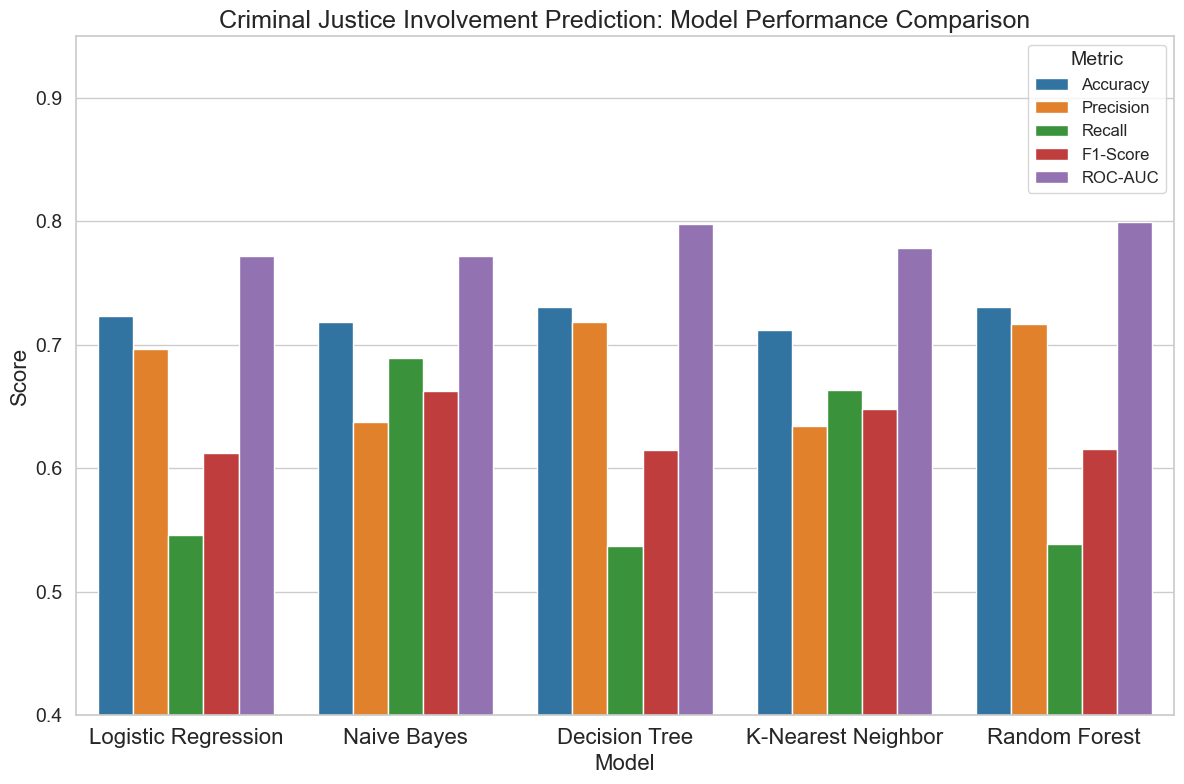

In [393]:
# plotting comparison chart
plt.figure(figsize=(12, 8))
sns.barplot(data=all_metrics_melted, x='Model', y='Score', hue='Metric', palette='tab10')

plt.title('Criminal Justice Involvement Prediction: Model Performance Comparison', fontsize=18)
plt.xlabel('Model', fontsize=16)
plt.ylabel('Score', fontsize=16)
plt.ylim(0.4, 0.95)
plt.xticks(fontsize=16)
plt.yticks(fontsize=14)
plt.legend(title='Metric', loc='upper right', fontsize=12, title_fontsize=14)
plt.tight_layout()
plt.show()